In [4]:
!pip install scikit-image

                                              0.0/12.9 MB ? eta -:--:--
                                              0.2/12.9 MB 5.3 MB/s eta 0:00:03
     -                                        0.6/12.9 MB 8.8 MB/s eta 0:00:02
     --                                       1.0/12.9 MB 7.6 MB/s eta 0:00:02
     ---                                      1.2/12.9 MB 8.8 MB/s eta 0:00:02
     -----                                    1.7/12.9 MB 8.1 MB/s eta 0:00:02
     ------                                   2.2/12.9 MB 8.4 MB/s eta 0:00:02
     --------                                 2.7/12.9 MB 9.0 MB/s eta 0:00:02
     ---------                                3.2/12.9 MB 9.6 MB/s eta 0:00:02
     -----------                              3.8/12.9 MB 10.0 MB/s eta 0:00:01
     -------------                            4.4/12.9 MB 10.0 MB/s eta 0:00:01
     ---------------                          4.9/12.9 MB 9.8 MB/s eta 0:00:01
     ----------------                         5.4/12.9 MB


[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


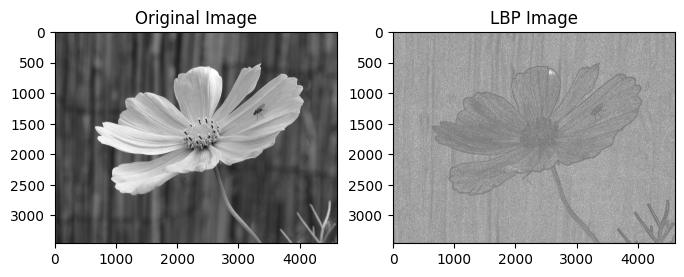

c:\Users\alpaf\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


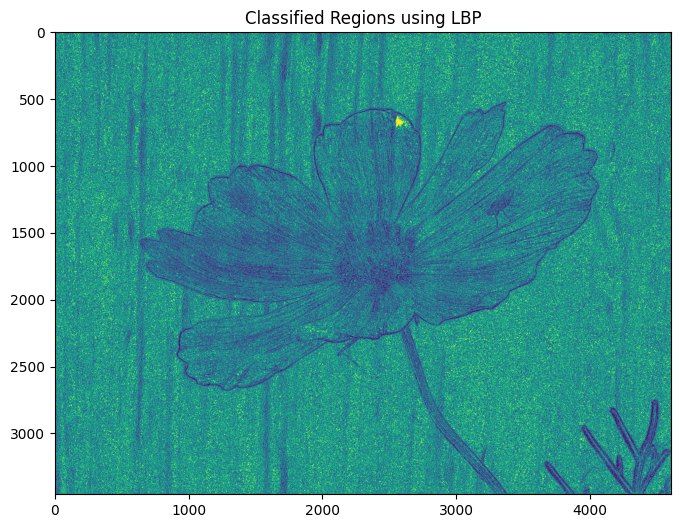

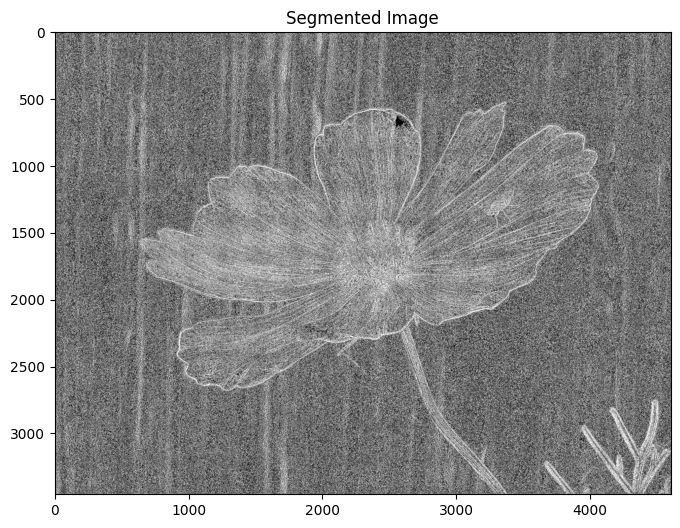

In [5]:
import cv2
import numpy as np
from skimage.feature import local_binary_pattern
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Step 1: Load an image
img = cv2.imread('img1.jpg', cv2.IMREAD_GRAYSCALE)  # Load in grayscale

if img is None:
    print("Error loading image")
else:
    # Step 2: Compute LBP features for the image
    radius = 1  # Radius for LBP
    n_points = 8 * radius  # Number of neighbors
    lbp_image = local_binary_pattern(img, n_points, radius, method="uniform")

    # Step 3: Visualize the LBP image
    plt.figure(figsize=(8, 6))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(img, cmap='gray')

    plt.subplot(1, 2, 2)
    plt.title("LBP Image")
    plt.imshow(lbp_image, cmap='gray')
    plt.show()

    # Step 4: Use the LBP image to classify pixels into different regions
    # Flatten the LBP image for clustering
    lbp_flattened = lbp_image.flatten().reshape(-1, 1)

    # Use K-means clustering to classify pixels into different regions
    kmeans = KMeans(n_clusters=3, random_state=0)  # 3 regions for example
    lbp_classification = kmeans.fit_predict(lbp_flattened)

    # Reshape the result back to the image shape
    lbp_classification_image = lbp_classification.reshape(lbp_image.shape)

    # Step 5: Visualize the classified regions
    plt.figure(figsize=(8, 6))
    plt.title("Classified Regions using LBP")
    plt.imshow(lbp_classification_image, cmap='viridis')
    plt.show()

    # Optional: Colorize the segmented regions
    segmented_image = np.zeros_like(img)
    segmented_image[lbp_classification_image == 0] = 255  # Class 1 (example)
    segmented_image[lbp_classification_image == 1] = 128  # Class 2 (example)
    segmented_image[lbp_classification_image == 2] = 64  # Class 3 (example)

    plt.figure(figsize=(8, 6))
    plt.title("Segmented Image")
    plt.imshow(segmented_image, cmap='gray')
    plt.show()
